# S&M Final Project

The goal of this project is to create projections for Canada's population based on census data from 1950 - 2022.

We start by importing the necessary libraries and dependencies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

Next we wrangle the census data located in the .csv file into a pandas dataframe.

In [5]:
filename = 'canada-population-2023-04-02.csv'
df = pd.read_csv(filename)

df.head()

,Year,Pop,AGR
0,1950,13743069,NaN
1,1951,14085724,2.49
2,1952,14485745,2.84
3,1953,14901525,2.87
4,1954,15323201,2.83


 The data contains 3 columns: Year, Population and Annual Growth Rate. Now that our data is in a form where we are able to manipulate it we can create a simple model of Canada's population history over time.

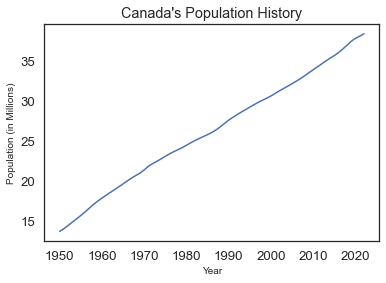

In [6]:
def plot_pop_census():
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Canada's Population History")

plot_pop_census()

This model gives us a basic idea of Canada's population growth over the past 70 years. However, in order to create accurate projections we want to use the annual growth rate. To get a good visualization of this data we should create a model of the annual growth rate over time.

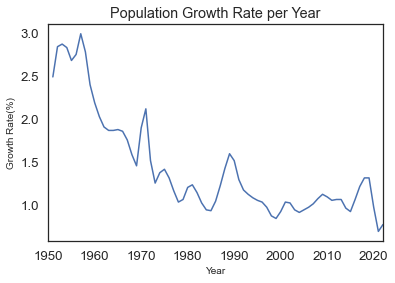

In [7]:
def plot_gr_census():
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Population Growth Rate per Year")

plot_gr_census()

Now that we have a good visualization of how the annual growth rate has changed, we should fit a line to the data and extrapolate into the future so we can form projections.

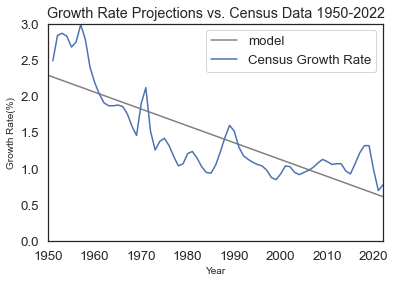

In [9]:
def alpha_func(t):
    intercept = 2.29
    slope = -0.02325
    return intercept + slope * (t - 1950)

t_array = linspace(1950, 2022, 72)
alpha_array = alpha_func(t_array)

def plot_growth_comparison():
    plt.plot(t_array, alpha_array, label='model', color='gray')
    plt.plot(df.Year,df.AGR, label="Census Growth Rate")
    plt.xlim(1950,2022)
    plt.ylim(0,3)
    plt.xlabel("Year")
    plt.ylabel("Growth Rate(%)")
    plt.title("Growth Rate Projections vs. Census Data 1950-2022")
    plt.legend()

plot_growth_comparison()

In [13]:
t_0 = 1950
t_end = 2120
p_0 = df.iloc[1,1]

pop_results = TimeSeries()
pop_results[t_0] = p_0




for t in range(t_0, t_end):
    pop_results[t+1] = pop_results[t] + pop_results[t]*alpha_func(t)/100

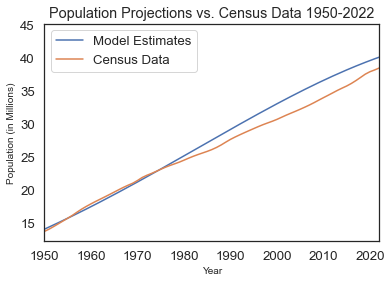

In [14]:
def plot_pop_estimates():
    plt.plot(pop_results.index,(pop_results/1e6))
    plt.xlim(2020,2120)
    plt.ylim(20,50)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Projected Population of Canada")

def plot_pop_comparison():
    plt.plot(pop_results.index,(pop_results/1e6), label="Model Estimates")
    plt.plot(df.Year,(df.Pop/1e6), label="Census Data")
    plt.xlim(1950,2022)
    plt.xlabel("Year")
    plt.ylabel("Population (in Millions)")
    plt.title("Population Projections vs. Census Data 1950-2022")
    plt.legend()

plot_pop_comparison()

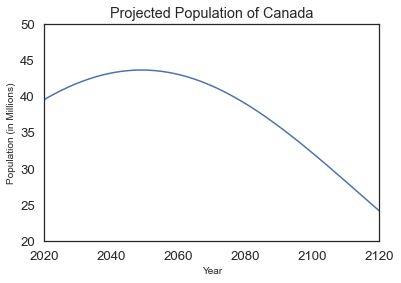

In [15]:
plot_pop_estimates()